In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

sns.set_style("darkgrid")

In [3]:
data = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7798,7799,15774127,Potter,518,France,Male,46,3,0.00,2,1,0,76515.79,0
4902,4903,15634491,Kung,652,France,Male,30,2,176166.56,2,1,1,152210.81,0
3808,3809,15698117,Jerger,701,Germany,Male,41,0,150844.94,1,0,1,127623.36,0
4848,4849,15807167,Konovalova,635,France,Male,42,1,146766.72,2,0,1,164357.10,0
6983,6984,15669501,Kuo,706,France,Male,35,5,0.00,2,1,1,81718.37,0
2222,2223,15763662,Longo,711,Germany,Male,43,2,39043.29,2,1,1,175423.69,0
148,149,15703264,Chukwufumnanya,735,France,Male,44,9,120681.63,1,1,0,74836.34,0
8308,8309,15719898,Young,556,France,Male,36,7,154872.08,2,1,1,32044.64,0
3143,3144,15722061,Allen,619,Germany,Female,41,8,142015.76,2,1,0,114323.66,0
2326,2327,15762984,McIntosh,648,Spain,Male,35,7,0.00,2,0,0,122899.01,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data = data.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
num_data = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
cat_data = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

In [9]:
print("numerical data: {}".format(num_data))
print("categorical data: {}".format(cat_data))

numerical data: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
categorical data: ['Geography', 'Gender']


## Exploratory Data Analysis 

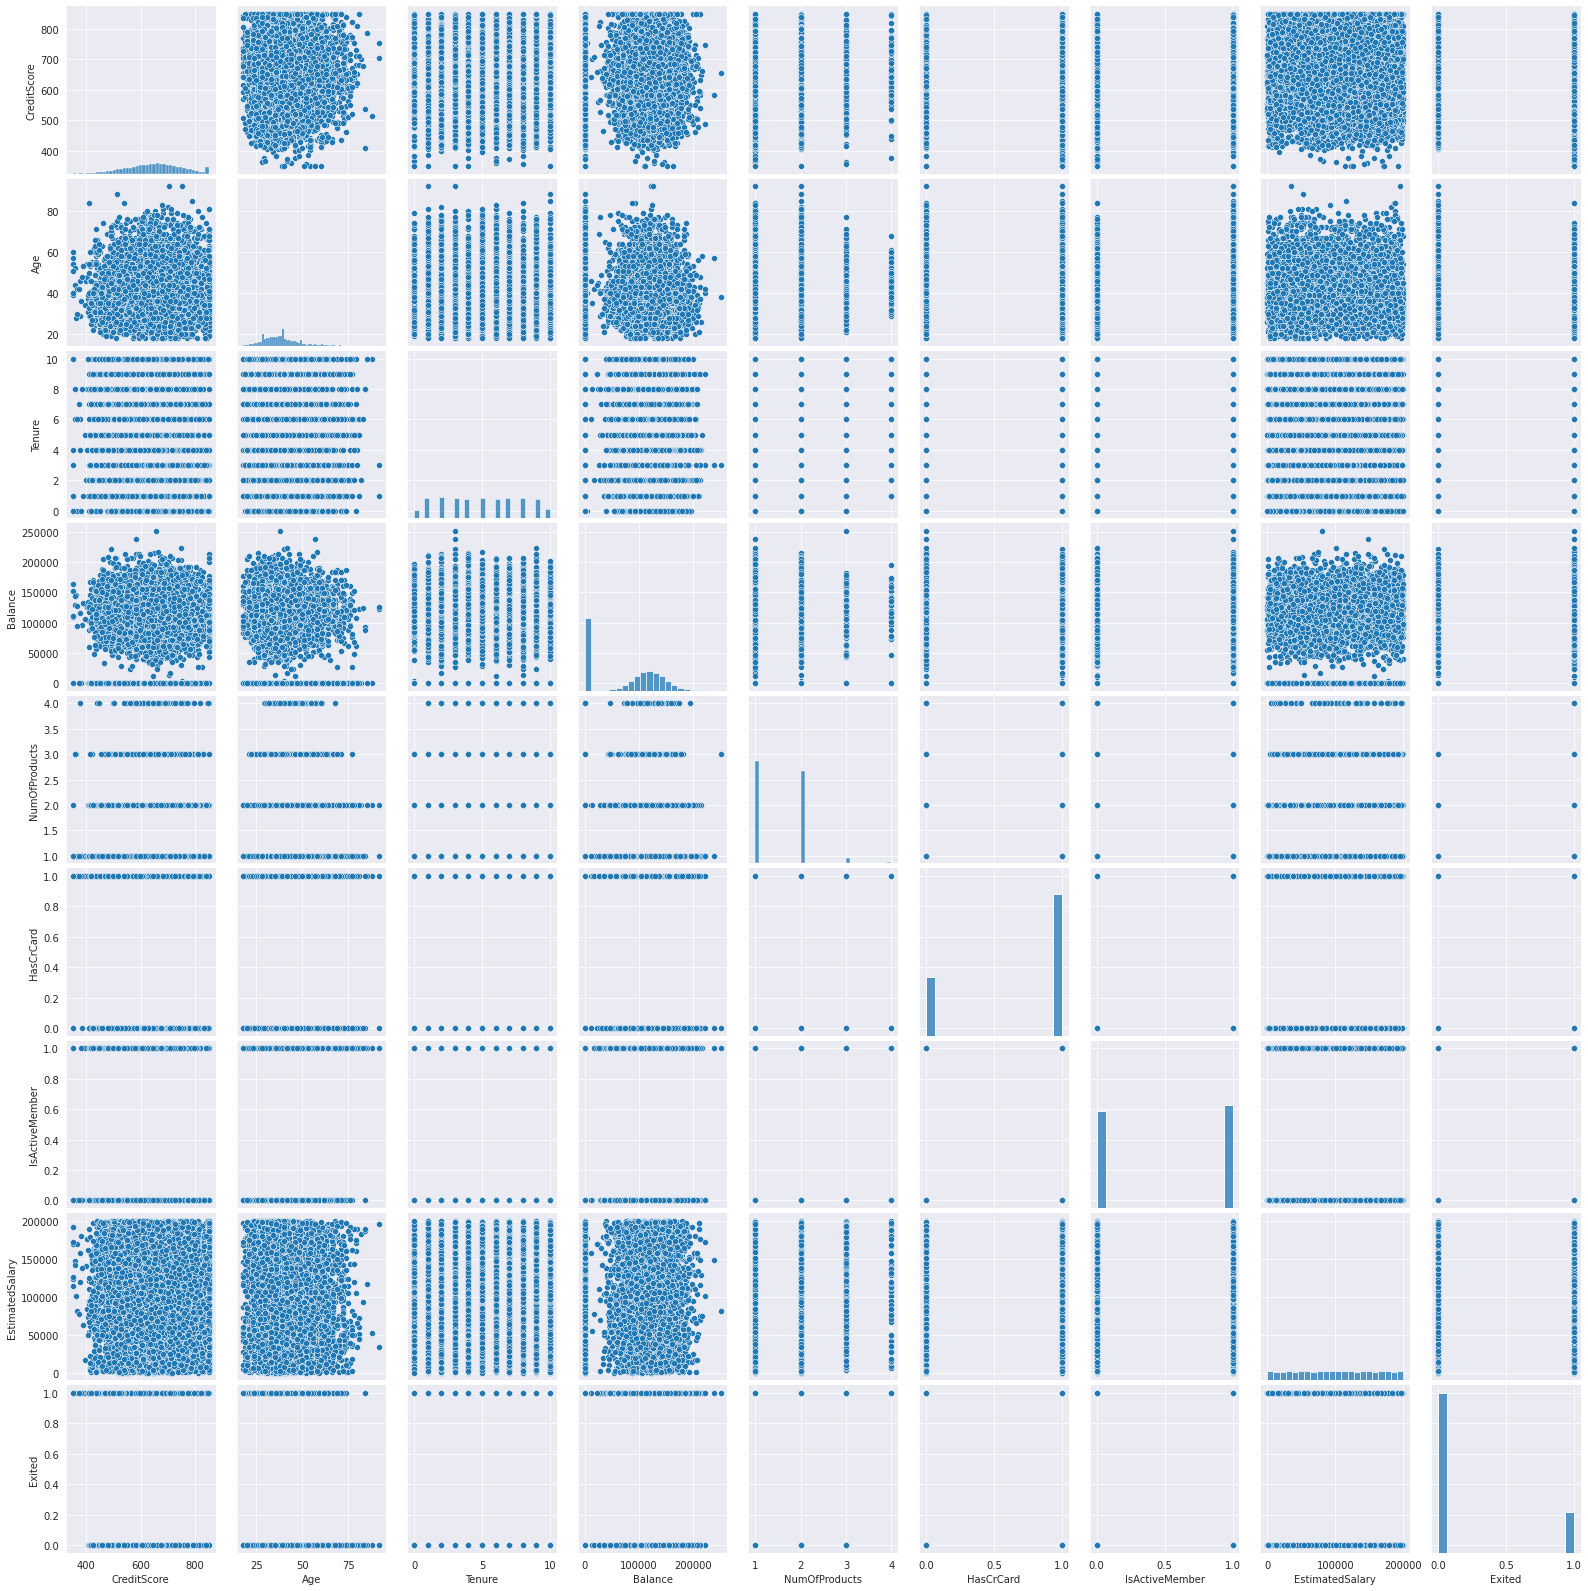

In [10]:
sns.pairplot(data)

<AxesSubplot:>

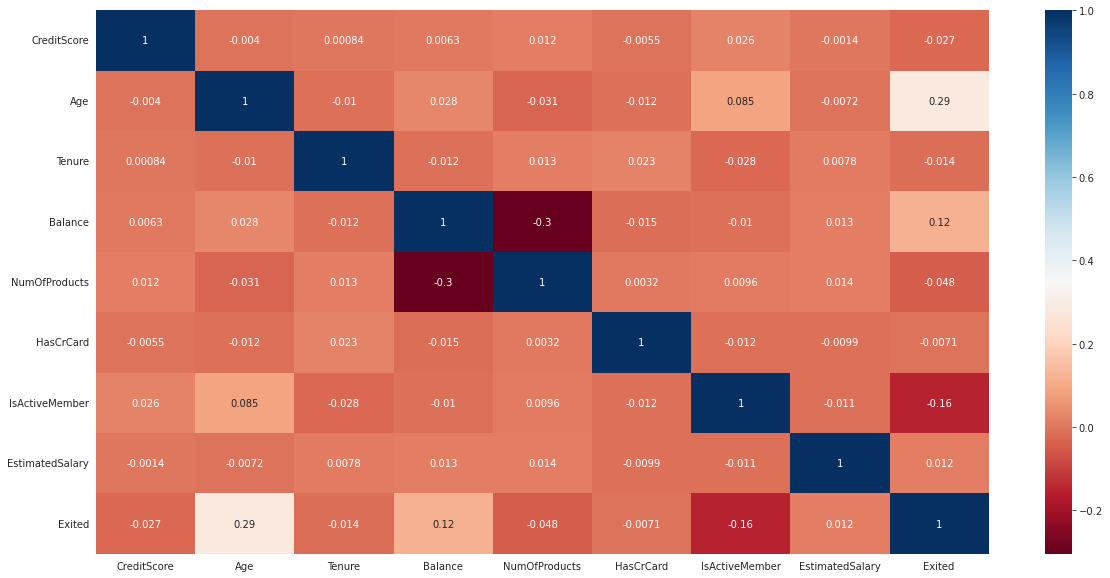

In [12]:
plt.figure(figsize = (20, 10))

sns.heatmap(data.corr(), cmap = "RdBu", annot = True)

Looks like there are quite little correlation between features in general, we could use these

In [31]:
# preparing the data 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ("min-max-scaler", MinMaxScaler())
])
cat_pipeline = Pipeline([
    ("cat", OneHotEncoder())
])

In [32]:
from sklearn.compose import ColumnTransformer 

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_data),
    ("cat", cat_pipeline, cat_data)
])

In [36]:
x = data.drop(columns = ["Exited"], axis = 1)
y = data["Exited"]

In [44]:
y.shape

(10000,)

In [37]:
prepared = pipeline.fit_transform(x)

In [39]:
prepared.shape

(10000, 15)

In [49]:
# preparing the data 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(prepared, y, test_size = 0.2, random_state = 0)

In [50]:
x_test.shape

(2000, 15)

## Model building 

In [51]:
# logistic regression 
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


Logistic Regression f1-score: 0.32675044883303417
Logistic Regression accuracy: 0.8125
[[1534   61]
 [ 314   91]]


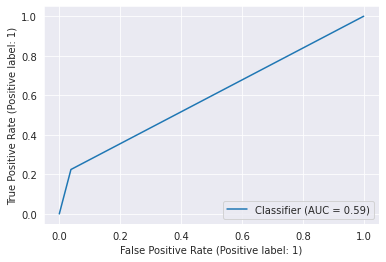

In [56]:
# logistic regression performance 
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

log_reg_score = f1_score(y_test, y_pred)
log_reg_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression f1-score: {}".format(log_reg_score))
print("Logistic Regression accuracy: {}".format(log_reg_acc))
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

It looks like the false positive percentage is quite high.

ROC Curve plots the FPR against the TPR, let's explore the classification using other models

In [57]:
# Gaussian NB 
from sklearn.naive_bayes import GaussianNB 

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

Gaussian f1-score: 0.4877384196185286
Gaussian accuracy: 0.812
[[1445  150]
 [ 226  179]]


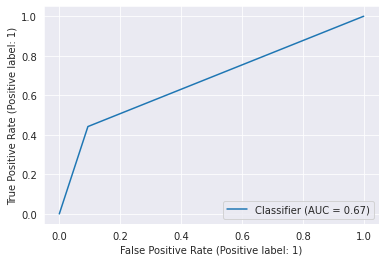

In [59]:
gaussian_score = f1_score(y_test, y_pred)
gaussian_acc = accuracy_score(y_test, y_pred)
print("Gaussian f1-score: {}".format(gaussian_score))
print("Gaussian accuracy: {}".format(gaussian_acc))
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

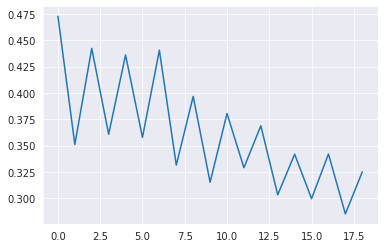

In [64]:
# K-Nearest Neighbours 
# for this, we could use the elbow method to find the best say, f1-score 
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 20):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    kn_score = f1_score(y_test, y_pred)
    scores.append(kn_score)
    
plt.plot(scores)

lets choose 6

In [65]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

KNN f1-score: 0.3577817531305903
KNN accuracy_score: 0.8205
[[1541   54]
 [ 305  100]]


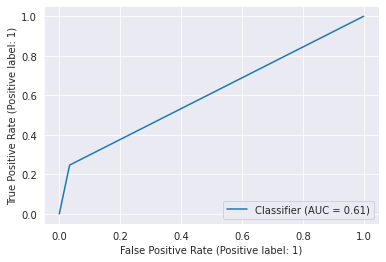

In [67]:
knn_f1_score = f1_score(y_test, y_pred)
knn_accuracy_score = accuracy_score(y_test, y_pred)
print("KNN f1-score: {}".format(knn_f1_score))
print("KNN accuracy_score: {}".format(knn_accuracy_score))
print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [68]:
# deep learning model 
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout 

In [70]:
x_test.shape

(2000, 15)

In [69]:
classifier = Sequential()

2022-11-17 20:45:51.947107: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [72]:
classifier.add(Dense(units = 8, kernel_initializer = "he_uniform", activation = "relu", input_dim = 15))
classifier.add(Dense(units = 8, kernel_initializer = "he_uniform", activation = "relu"))
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [73]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

2022-11-17 20:55:22.008509: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4822 - accuracy: 0.7966 - val_loss: 0.4756 - val_accuracy: 0.7974
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.8024 - val_loss: 0.4672 - val_accuracy: 0.7997
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4580 - accuracy: 0.8052 - val_loss: 0.4602 - val_accuracy: 0.8050
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8061 - val_loss: 0.4548 - val_accuracy: 0.7952
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8091 - val_loss: 0.4502 - val_accuracy: 0.8088
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.8132 - val_loss: 0.4391 - val_accuracy: 0.8039
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4268 - accuracy: 0.8173 - val_loss: 0.4395 - val_accuracy: 0.8020

In [74]:
y_pred = classifier.predict(x_test)

In [75]:
y_pred = (y_pred > 0.5)

ANN f1 score: 0.5901639344262296
ANN accuracy score: 0.85
[[1484  111]
 [ 189  216]]


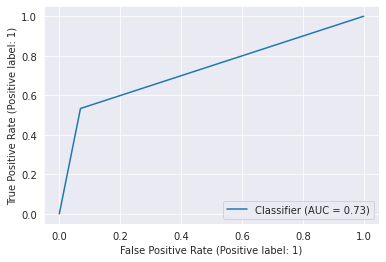

In [78]:
ANN_f1_score = f1_score(y_test, y_pred)
ANN_accuracy_score = accuracy_score(y_test, y_pred)
print("ANN f1 score: {}".format(ANN_f1_score))
print("ANN accuracy score: {}".format(ANN_accuracy_score))

print(confusion_matrix(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()